In [28]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

recordings = pd.read_csv('../recordings.csv')['recording_file'].tolist()

print(recordings)

['test1.wav', 'test2.wav', 'test3.wav', 'test4.wav']


In [46]:
features = []
items = []
for file in recordings:
    file_name = file.rsplit('.', 1)[0].lower()
    datafile = f'../data/{file_name}/data.csv'
    features_i = pd.read_csv(datafile, header=0).iloc[:, 4:].values.tolist()
    item = pd.read_csv(datafile, header=0).iloc[:, 0:4].values.tolist()
    # print(item)
    features.extend(features_i) # ndarray (num_seg, 64 feature dimensions)
    items.extend(item)
features = np.array(features)
items = np.array(items)
print(features.shape[0], items.shape[0])

214 214


In [8]:
tsne = TSNE(n_components=2, learning_rate='auto', perplexity=30)
features_embedded = tsne.fit_transform(features)
print(features_embedded.shape)

(214, 2)


In [60]:
data_2d = np.append(items, features_embedded, axis=1)



array([['test1.wav', '0', '0.0', '0.5', '-4.6723304', '1.8728935'],
       ['test1.wav', '1', '0.5', '1.0', '20.678532', '-1.395983'],
       ['test1.wav', '2', '1.0', '1.5', '3.2787902', '2.2523382'],
       ['test1.wav', '3', '1.5', '2.0', '-4.596155', '1.8792369'],
       ['test1.wav', '4', '2.0', '2.5', '11.458949', '0.63011956']],
      dtype='<U32')

In [26]:
# # Placeholder database
# import csv
# with open('../recordings.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['username', 'recording_file'])
# for i in [1,2,3,4]:
#     with open('../recordings.csv', 'a', newline='') as csvfile:
#         writer = csv.writer(csvfile)
#         writer.writerow(['agrainof', f'test{i}.wav'])

# Plots and tests

In [13]:
tsne.get_feature_names_out()

array(['tsne0', 'tsne1'], dtype=object)

In [12]:
import matplotlib.pyplot as plt

# # Plot the result
# plt.figure(figsize=(12, 8))
# scatter = plt.scatter(features_embedded[:, 0], features_embedded[:, 1], s=1)#, c=y_subset.astype(int), cmap='tab10')
# plt.legend(*scatter.legend_elements(), title="Digits")
# plt.title('t-SNE')
# plt.show()

<Axes: >

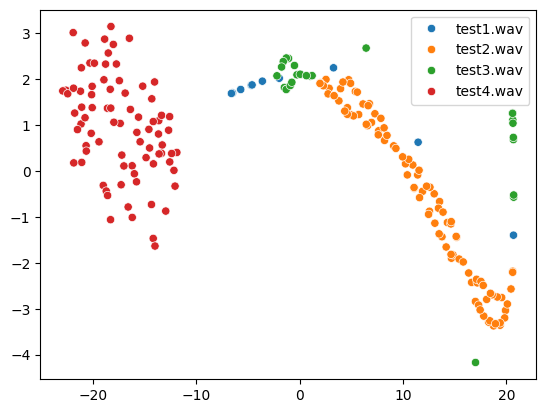

In [10]:
import seaborn as sns
sns.scatterplot(x=features_embedded[:, 0], y=features_embedded[:, 1], hue=items[:,0].tolist())

In [18]:
import umap.umap_ as umap
standard_embedding = umap.UMAP(random_state=42).fit_transform(features)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

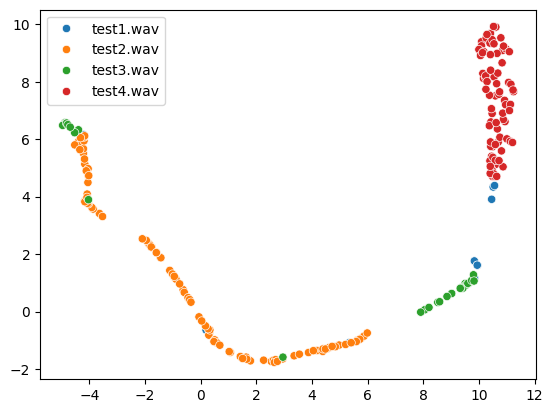

In [19]:
sns.scatterplot(x=standard_embedding[:, 0], y=standard_embedding[:, 1], hue=items[:,0].tolist())